In [1]:
import os
import sys

%load_ext autoreload
%autoreload 2

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.auto_vs_human.paranlu_auto import roberta_specialized_automatic, roberta_specialized


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 26451.80it/s]


In [2]:
from paraphrase_utils import get_lexical_diversity_score

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     /nfshomes/nehasrik/nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


In [6]:
from experiments.auto_vs_human.surface_form_metrics.lex_syn import get_lexical_diversity_bucket_analysis
from utils import write_json, PROJECT_ROOT_DIR, load_json

In [31]:
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

directory_path = os.path.join(PROJECT_ROOT_DIR, 'experiments/auto_vs_human/surface_form_metrics/results/')
datasets = defaultdict(list)

for filename in sorted(os.listdir(directory_path)):

    split = filename.split('.')[0].split('-lex')[0]
    print(split)
    if not filename.endswith('.json'):
        continue

    distribution = np.array(list(load_json(os.path.join(directory_path, filename)).values()))
    datasets[split.split('-')[0]].append(distribution)

anli-auto
anli-human
atomic-auto
atomic-human
snli-auto
snli-human
social-auto
social-human


#### anli ####
Summary:
	Mean: auto=0.25036837792636296, human=0.35255268970085035
	Median: auto=0.2507936507936508, human=0.3443817710067709
	Min: auto=0.0, human=0.08545918367346939
	Max: auto=0.6354938271604937, human=0.6632539682539682


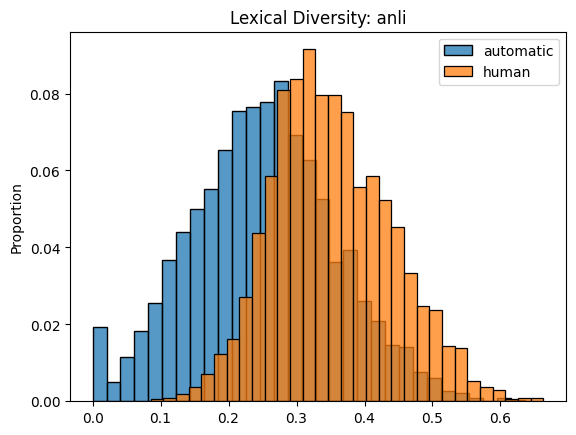

#### atomic ####
Summary:
	Mean: auto=0.3040396581297525, human=0.3689061560077507
	Median: auto=0.2957135189019247, human=0.35936507936507933
	Min: auto=0.0, human=0.0
	Max: auto=0.7739393939393938, human=0.839572192513369


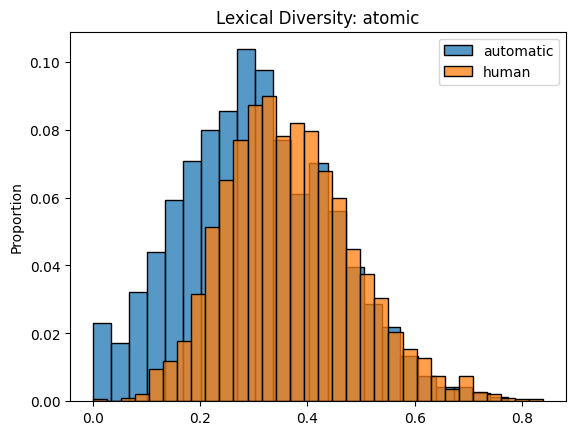

#### snli ####
Summary:
	Mean: auto=0.24097422644821526, human=0.3440808490201174
	Median: auto=0.2309178743961352, human=0.33529411764705874
	Min: auto=0.0, human=0.015873015873015817
	Max: auto=0.8483091787439613, human=0.8571428571428572


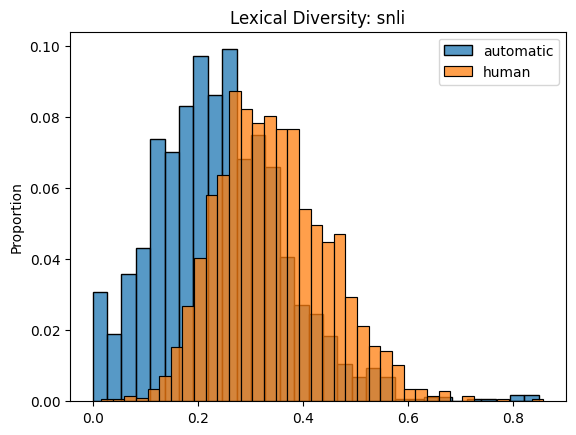

#### social ####
Summary:
	Mean: auto=0.3078017177357655, human=0.39906034152758457
	Median: auto=0.3069231019606959, human=0.3936285936285936
	Min: auto=0.0, human=0.06766917293233088
	Max: auto=0.8117647058823529, human=0.7888888888888889


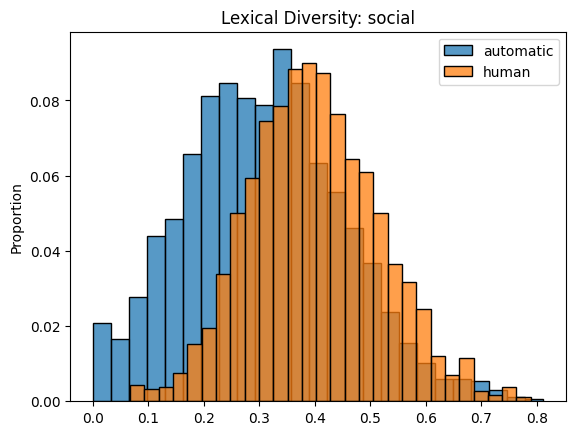

In [42]:
for dataset, (auto, human) in datasets.items():
    print(f'#### {dataset} ####')

    print(f'Summary:\n\tMean: auto={np.mean(auto)}, human={np.mean(human)}\n\tMedian: auto={np.median(auto)}, human={np.median(human)}\n\tMin: auto={np.min(auto)}, human={np.min(human)}\n\tMax: auto={np.max(auto)}, human={np.max(human)}')
    
    plt.figure()
    sns.histplot(data=auto, stat='proportion', label='automatic')
    sns.histplot(data=human, stat='proportion', label='human')
    plt.title(f'Lexical Diversity: {dataset}')  # Add a title to distinguish plots
    plt.legend()
    plt.show()

In [ ]:
stats.pearsonr(
    [p['pred_conf_shift'] for bucket in abductive_bucket_preds.values() for p in bucket['bucket_confidences']],
    [p['syntactic_distance'] for bucket in abductive_bucket_preds.values() for p in bucket['bucket_confidences']]
)